------------------------------
#### understanding relations
------------------------

#### Pearson's Correlation Coefficient (r):

- Measures the linear relationship between two continuous variables.
- Values range between -1 and 1:
    - -1: Perfect negative linear relationship
    - 0: No linear relationship
    - 1: Perfect positive linear relationship
- Assumes that the data follows a normal distribution and is interval or ratio in scale.

**Explanation**
- How CORR is derived from COV

Covariance :  5.0


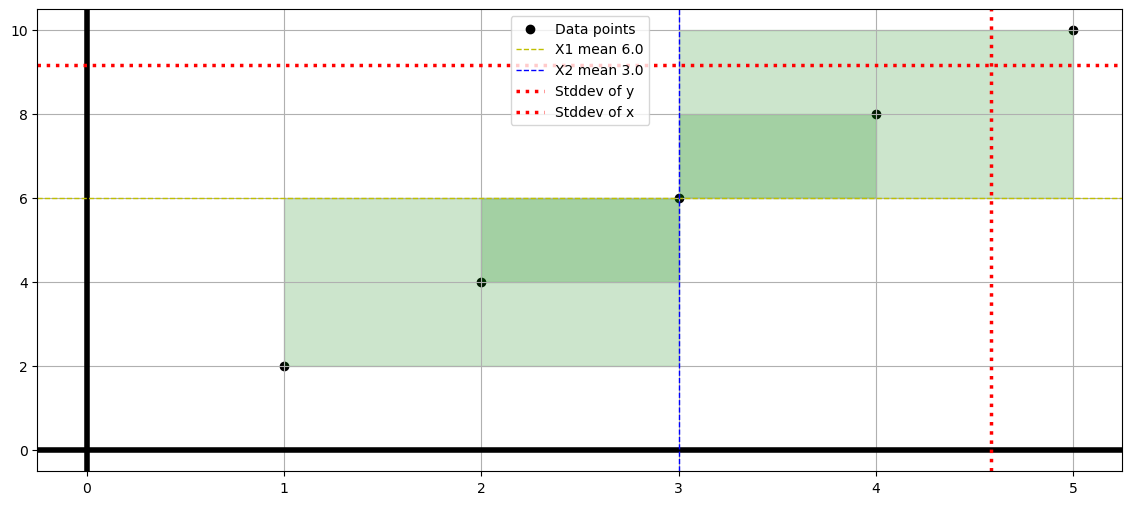

In [40]:
# Sample data
# x = np.array([1, 2, 3, 4, 5])
# y = np.array([2, 4, 6, 8, 10])

data = np.array([[1, 2],
                 [2, 4],
                 [3, 6],
                 [4, 8],
                 [5, 10], 
                 ])

x_bar = np.round(np.mean(data[:, 0]), 4)
y_bar = np.round(np.mean(data[:, 1]), 4)

df = pd.DataFrame(data, columns=['x1', 'x2'])

df['x1-mean'] = df.x1 - x_bar
df['x2-mean'] = df.x2 - y_bar

df['x1x2']    = (df.x1 - x_bar) * (df.x2 - y_bar)

cov = np.sum(df.x1x2)/(df.shape[0]-1)

# Calculate covariance matrix
cov_matrix = np.cov(df.x1, df.x2)

# Extract covariance value
covariance = cov_matrix[0, 1]

# Calculate standard deviations
stddev_x = df.x1.std()
stddev_y = df.x2.std()

# Calculate correlation coefficient
correlation = covariance / (stddev_x * stddev_y)

plt.figure(figsize=(14, 6))

ax = plt.gca()
plt.grid()

ax.axhline(linewidth=4, color='k')
ax.axvline(linewidth=4, color='k')

# plot the random number
ax.scatter(data[:, 0], data[:, 1], c='k', label='Data points')

ax.axhline(y= y_bar, linewidth=1, color='y', linestyle="--", label = 'X1 mean {}'.format((y_bar)))
ax.axvline(x= x_bar, linewidth=1, color='b', linestyle="--", label = 'X2 mean {}'.format((x_bar)))

# Plot stddev lines
plt.axhline(y_bar + stddev_y, color='red', linestyle='dotted', label='Stddev of y', linewidth=2.5)
plt.axvline(x_bar + stddev_x, color='red', linestyle='dotted', label='Stddev of x', linewidth=2.5)

# read all the data points
for idx, row in df.iterrows():
    someX, someY = row.x1, row.x2
    
    dist_x_bar  = someX - x_bar
    dist_y_bar  = someY - y_bar
    
    # positive or negative relation
    if dist_x_bar * dist_y_bar < 0:
        fill_color = ['red']
        ax.add_patch(Rectangle((someX , someY ), -dist_x_bar, -dist_y_bar, color='r', alpha=.2))
    else:
        fill_color = ['green']
        ax.add_patch(Rectangle((someX , someY ), -dist_x_bar, -dist_y_bar, color='g', alpha=.2))
            
ax.legend();
print('Covariance : ', covariance)

**what if the input data is always in a fixed range**

In [ ]:
ctr = 0

start_range  = 11
finish_range = 20

for ctr in range(50):
    
    data = np.random.randint(start_range, finish_range, size=(5,2))

    x_bar = np.round(np.mean(data[:, 0]), 4)
    y_bar = np.round(np.mean(data[:, 1]), 4)

    df = pd.DataFrame(data, columns=['x1', 'x2'])

    df['x1-mean'] = df.x1 - x_bar
    df['x2-mean'] = df.x2 - y_bar

    df['x1x2']    = (df.x1 - x_bar) * (df.x2 - y_bar)

    cov = np.sum(df.x1x2)/(df.shape[0]-1)

    # Calculate covariance matrix
    cov_matrix = np.cov(df.x1, df.x2)

    # Extract covariance value
    covariance = cov_matrix[0, 1]

    # Calculate standard deviations
    stddev_x = df.x1.std()
    stddev_y = df.x2.std()

    # Calculate correlation coefficient
    correlation = covariance / (stddev_x * stddev_y)

    print('Iteration : {}, covariance = {:8.4f}'.format(ctr, covariance))

- When both variables have the same units and similar magnitudes, covariances are easy to compare . 

- However, when the variables have different units or scales, assessing the covariances can be difficult in terms of strength

> that is we divide the COV with std dev of x and y

In [41]:
import numpy as np
import pandas as pd

# Generate synthetic data
np.random.seed(42)
hours_studied = np.random.randint(1, 6, 50)
exam_scores   = hours_studied * 10 + np.random.normal(0, 5, 50)

# Create a DataFrame
data = pd.DataFrame({'Hours_Studied': hours_studied, 'Exam_Scores': exam_scores})

# Calculate the correlation coefficient
correlation_coefficient = data['Hours_Studied'].corr(data['Exam_Scores'])

print("\nCorrelation Coefficient:", correlation_coefficient)


Correlation Coefficient: 0.9495798944178822


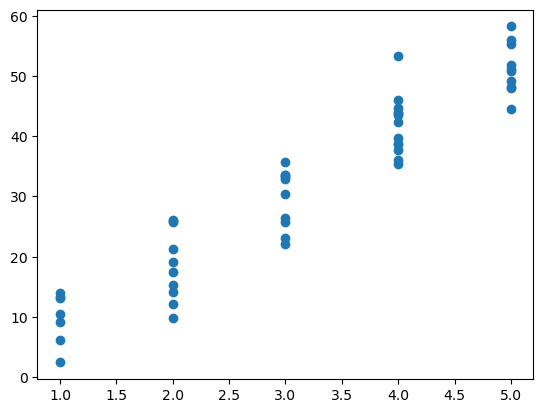

In [43]:
plt.scatter(data['Hours_Studied'], data['Exam_Scores']);